In [140]:
import numpy as np
from IPython.display import clear_output
import time
import random
import matplotlib.pyplot as plt

In [141]:
class Environment:
    
    def __init__(self, rows, cols, walls):
        
        self.rows = rows
        self.cols = cols
        self.walls = walls
        self.x = 0
        self.y = 0
        self.x_prev = 0
        self.y_prev = 0
        self.bank = 0
        
    def draw(self):
        for row in range(self.rows):
            for col in range(self.cols):
                if ((self.rows-row-1, col)) in self.walls:
                    print("{}   ".format("1"), end="")
                elif ((self.rows-row-1, col)) == (self.rows-1, self.cols-1):
                    print("{}   ".format("F"), end="")
                elif ((self.rows-row-1, col)) == (self.x, self.y):
                    print("{}   ".format("P"), end="")
                else:
                    print("{}   ".format("0"), end="")
            print("\n")
                        
    def step(self, action):
        slips = np.random.choice([True, False], p=[0.2, 0.8])
        self.x_prev=self.x
        self.y_prev=self.y
        if action == "LEFT":
            if slips:
                self.x=self.x+np.random.choice([1, -1], p=[0.5, 0.5])
            else:
                self.y=self.y-1
            self.correct()
            return self.reward()
        elif action == "RIGHT":
            if slips:
                self.x=self.x+np.random.choice([1, -1], p=[0.5, 0.5])
            else:
                self.y=self.y+1
            self.correct()
            return self.reward()
        elif action == "UP":
            if slips:
                self.y=self.y+np.random.choice([1, -1], p=[0.5, 0.5])
            else:
                self.x=self.x+1
            self.correct()
            return self.reward()
        elif action == "DOWN":
            if slips:
                self.y=self.y+np.random.choice([1, -1], p=[0.5, 0.5])
            else:
                self.x=self.x-1
            self.correct()
            return self.reward()
        
    def reward(self):
        if ((self.rows-self.x-1, self.y)) == (self.rows-1, self.cols-1):
            self.bank+=1
            self.restart()
            return 1
        else:
            return 0
        
    def correct(self):
        if self.x<0:
            self.x=self.x_prev
        elif self.x==self.rows:
            self.x=self.x_prev
        elif self.y<0:
            self.y=self.y_prev
        elif self.y==self.cols:
            self.y=self.y_prev
        elif ((self.x, self.y)) in self.walls:
            self.x=self.x_prev
            self.y=self.y_prev
            
    def restart(self):
        self.x = 0
        self.y = 0
        self.x_prev = 0
        self.y_prev = 0
        
    def reset(self):
        self.restart()
        self.bank = 0

In [142]:
ROWS = 11
COLS = 11
WALLS = [
    (5, 0),
    (5, 2),
    (5, 3),
    (5, 4),
    (5, 5),
    (4, 5),
    (4, 6),
    (4, 7),
    (4, 9),
    (4, 10),
    (0, 5),
    (2, 5),
    (3, 5),
    (6, 5),
    (7, 5),
    (9, 5),
    (10, 5),
]

environment = Environment(rows=ROWS, cols=COLS, walls=WALLS)

In [143]:
def run_interactive():
    while True:
        clear_output(wait=True)
        environment.draw()
        action = input()
        environment.step(action)

In [144]:
def run_random():
    environment.reset()
    rewards = []
    for trial in range(10):
        temp = []
        for step in range(10**4):
            environment.step(random.choice(["RIGHT", "LEFT", "UP", "DOWN"]))
            temp.append(environment.bank)
        rewards.append(temp)
        environment.reset()
    return rewards

In [145]:
def run_better():
    environment.reset()
    rewards = []
    for trial in range(10):
        temp = []
        for step in range(10**4):
            environment.step(np.random.choice(["RIGHT", "LEFT", "UP", "DOWN"], p=[0.4, 0.2, 0.2, 0.2]))
            temp.append(environment.bank)
        rewards.append(temp)
        environment.reset()
    return rewards

In [146]:
def run_worse():
    environment.reset()
    rewards = []
    for trial in range(10):
        temp = []
        for step in range(10**4):
            environment.step(np.random.choice(["RIGHT", "LEFT", "UP", "DOWN"], p=[0.2, 0.4, 0.2, 0.2]))
            temp.append(environment.bank)
        rewards.append(temp)
        environment.reset()
    return rewards

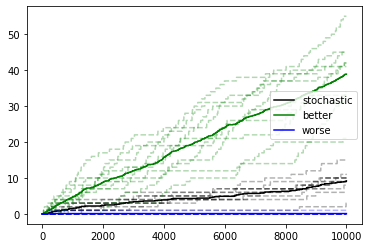

<Figure size 1440x720 with 0 Axes>

In [157]:
stochastic = run_random()
for sums in stochastic:
    plt.plot(sums, "--", alpha=0.3, color="black")
plt.plot(np.average(stochastic, axis=0), label="stochastic", color="black")

better = run_better()
for sums in better:
    plt.plot(sums, "--", alpha=0.3, color="green")
plt.plot(np.average(better, axis=0), label="better", color="green")

worse = run_worse()
for sums in worse:
    plt.plot(sums, "--", alpha=0.3, color="blue")
plt.plot(np.average(worse, axis=0), label="worse", color="blue")

plt.legend(loc="right")

plt.show()